# Trabajo práctico 3

**Nombre**: Cristina Arroyo Huerta

* Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs/TP3/images a partir del template Material_TPs/TP3/template.

3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import imutils

In [2]:
def auto_canny(image):
    otsu_threshold, otsu_image = cv.threshold(image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    lower_threshold = 0.5 * otsu_threshold
    upper_threshold = 1.5 * otsu_threshold
    edges = cv.Canny(image, lower_threshold, upper_threshold)

    return edges

In [3]:
def find_logos(image_path, template_path, method, percentage=0.01):
    image = cv.imread(image_path)
    template = cv.imread(template_path)
    template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    template_height, template_width = template.shape[:2]

    template = auto_canny(template)

    found_logos = []

    for scale in np.linspace(0.1, 4, 200):
        resized = imutils.resize(gray, width=int(gray.shape[1] * scale))

        if resized.shape[0] > template_height and resized.shape[1] > template_width:
            edged = auto_canny(resized)

            result = cv.matchTemplate(edged, template, method)
            min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

            ratio = 1/scale
            
            cond1 = method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]
            
            if cond1:
                x_start, y_start = (int(min_loc[0] * ratio), int(min_loc[1] * ratio))
                x_end, y_end = (int((min_loc[0] + template_width) * ratio), int((min_loc[1] + template_height) * ratio))
                score = result[min_loc[1], min_loc[0]]
                reverse = False

            else:
                x_start, y_start = (int(max_loc[0] * ratio), int(max_loc[1] * ratio))
                x_end, y_end = (int((max_loc[0] + template_width) * ratio), int((max_loc[1] + template_height) * ratio))
                score = result[max_loc[1], max_loc[0]]
                reverse = True

            found_logos.append({
                'bbox': ((x_start, y_start), (x_end, y_end)),
                'score': score,  #score del resultado
            })

    found_logos = sorted(found_logos, key=lambda x: x['score'], reverse=reverse)
    N = int(percentage * len(found_logos))
    # Dibujar rectangulos para los N top logos
    for logo in found_logos[:N]:
        bbox = logo['bbox']
        cv.rectangle(rgb_image, bbox[0], bbox[1], (0, 0, 255), 5)

    return rgb_image, found_logos

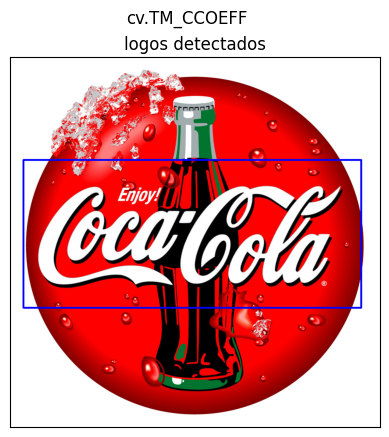

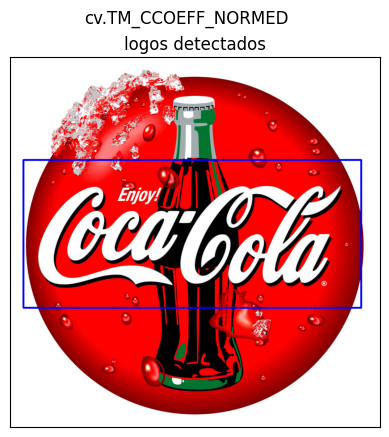

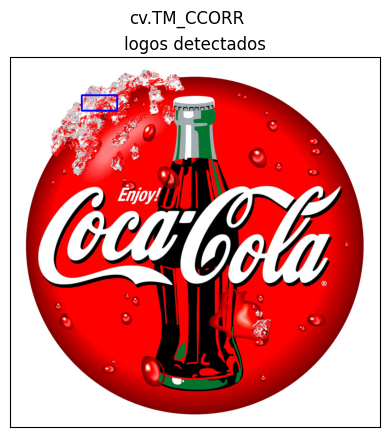

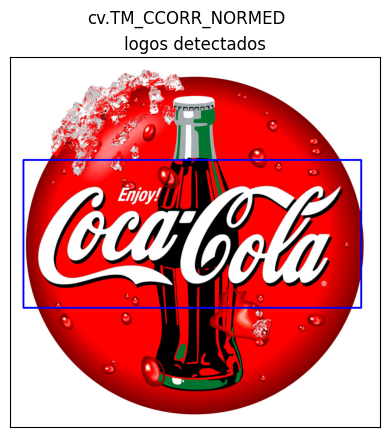

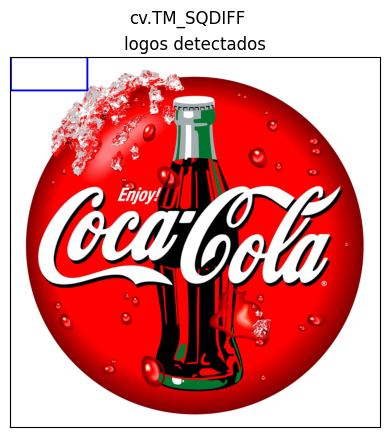

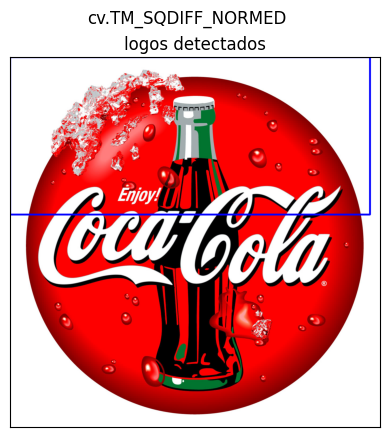

In [4]:
image_path = './images/COCA-COLA-LOGO.jpg'
template_path = './template/pattern.png'

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']


for meth in methods:    
    method = eval(meth)
    result_image, found_logos = find_logos(image_path, template_path, method)
    
    plt.figure()
    
    plt.subplot(111),plt.imshow(result_image)
    plt.title(f'logos detectados'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(meth)
    plt.show()

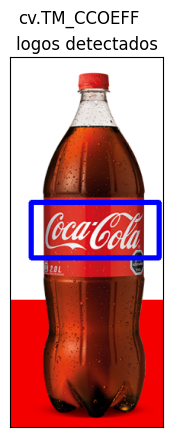

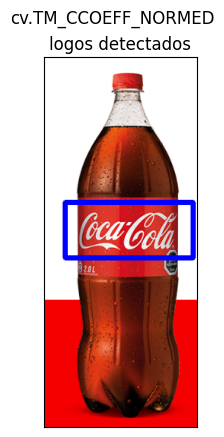

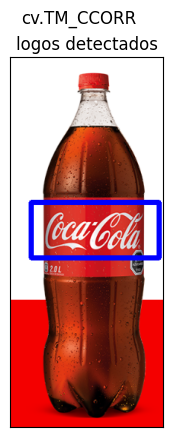

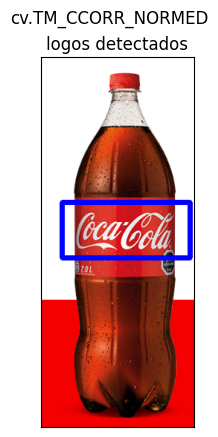

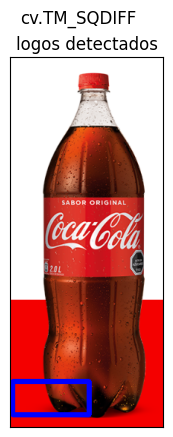

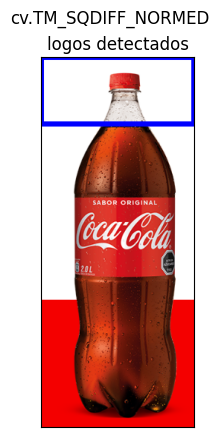

In [5]:
image_path = './images/coca_logo_1.png'
template_path = './template/pattern.png'

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']


for meth in methods:    
    method = eval(meth)
    result_image, found_logos = find_logos(image_path, template_path, method)
    
    plt.figure()
    
    plt.subplot(111),plt.imshow(result_image)
    plt.title(f'logos detectados'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(meth)
    plt.show()

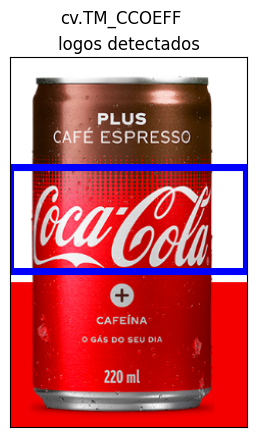

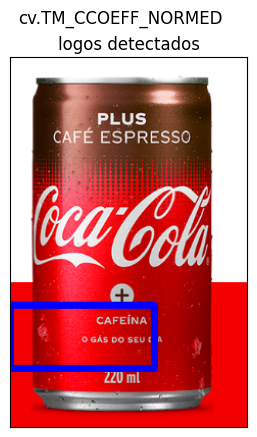

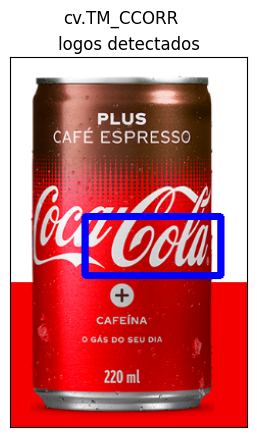

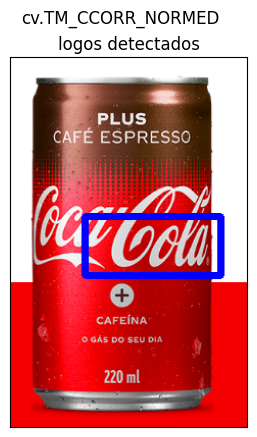

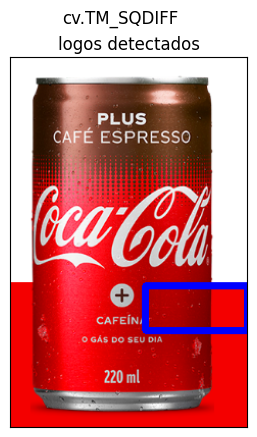

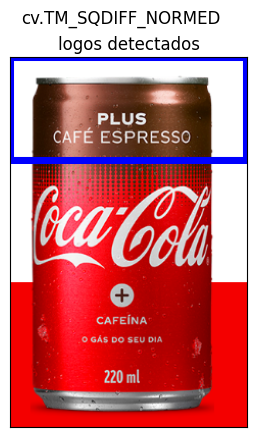

In [6]:
image_path = './images/coca_logo_2.png'
template_path = './template/pattern.png'

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']


for meth in methods:    
    method = eval(meth)
    result_image, found_logos = find_logos(image_path, template_path, method)
    
    plt.figure()
    
    plt.subplot(111),plt.imshow(result_image)
    plt.title(f'logos detectados'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(meth)
    plt.show()

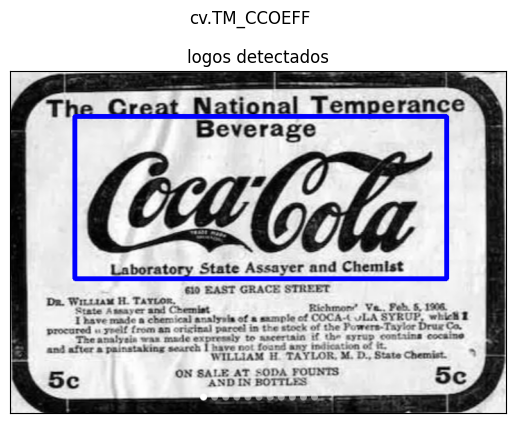

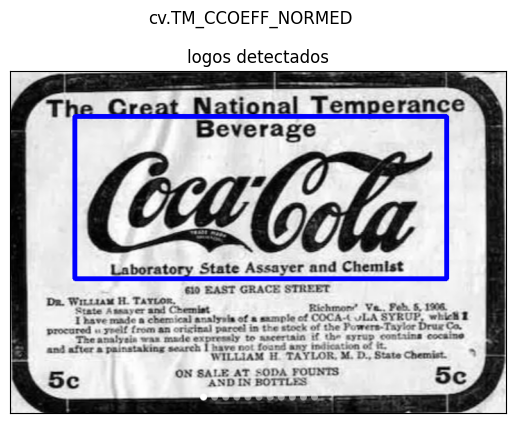

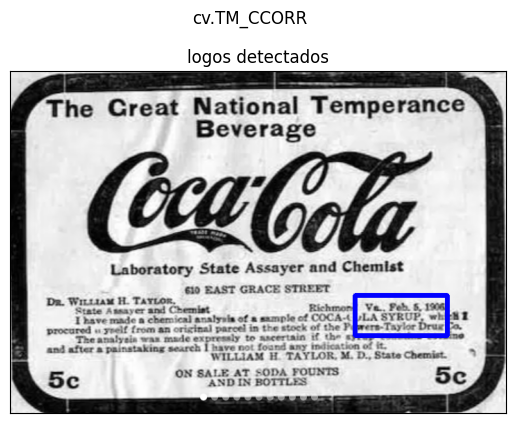

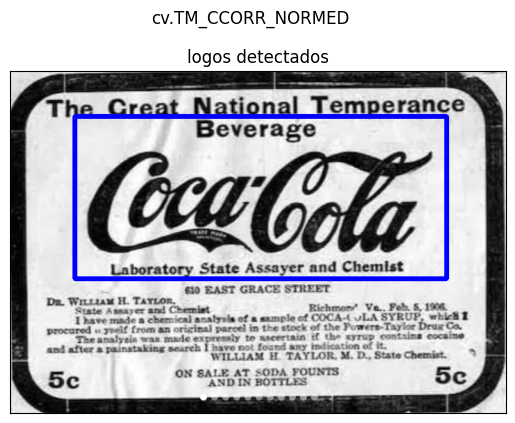

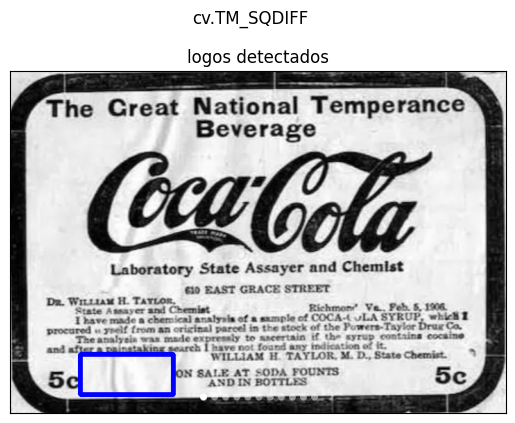

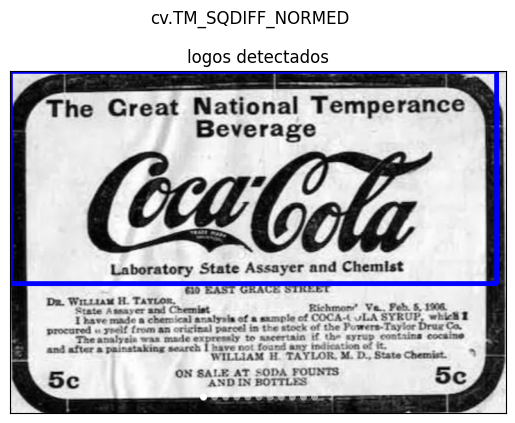

In [7]:
image_path = './images/coca_retro_1.png'
template_path = './template/pattern.png'

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']


for meth in methods:    
    method = eval(meth)
    result_image, found_logos = find_logos(image_path, template_path, method)
    
    plt.figure()
    
    plt.subplot(111),plt.imshow(result_image)
    plt.title(f'logos detectados'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(meth)
    plt.show()

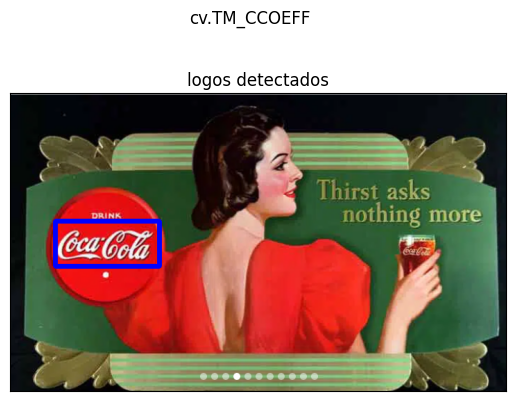

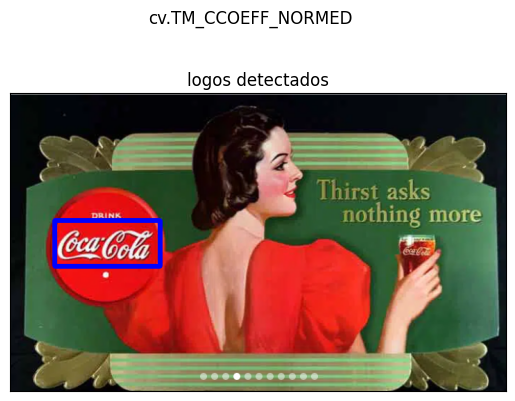

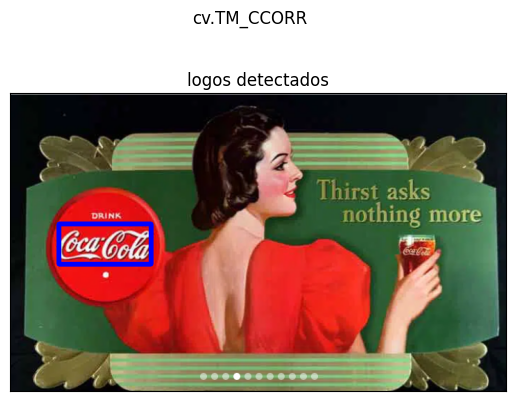

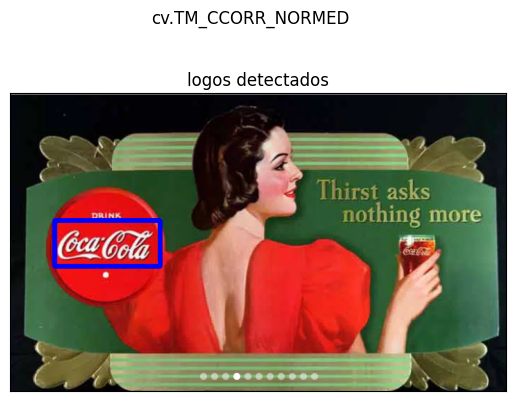

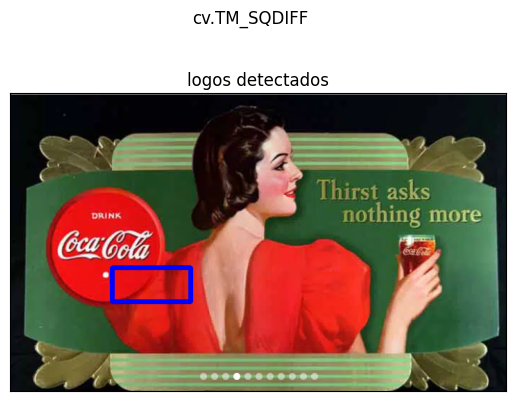

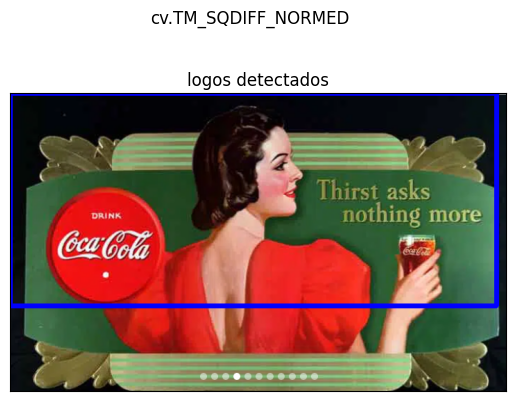

In [8]:
image_path = './images/coca_retro_2.png'
template_path = './template/pattern.png'

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']


for meth in methods:    
    method = eval(meth)
    result_image, found_logos = find_logos(image_path, template_path, method)
    
    plt.figure()
    
    plt.subplot(111),plt.imshow(result_image)
    plt.title(f'logos detectados'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(meth)
    plt.show()

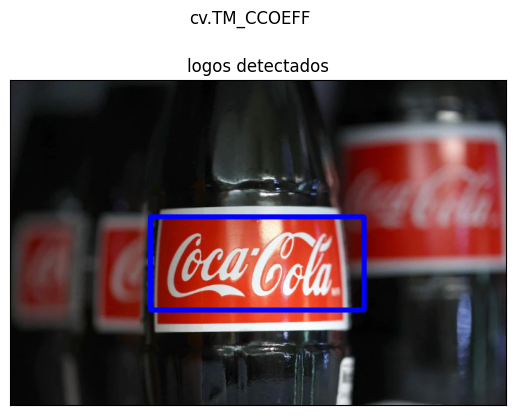

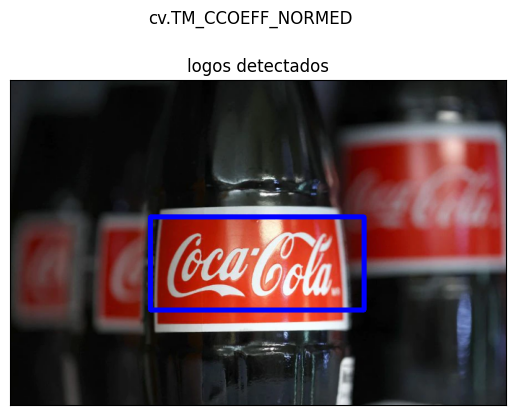

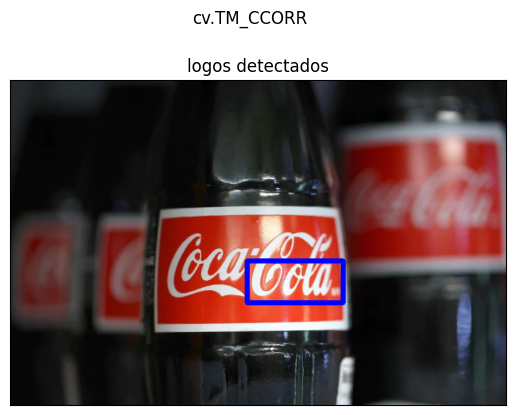

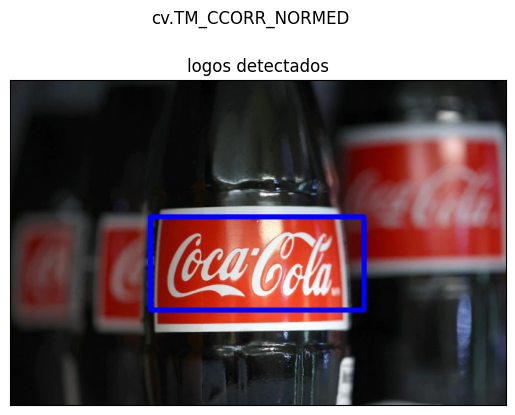

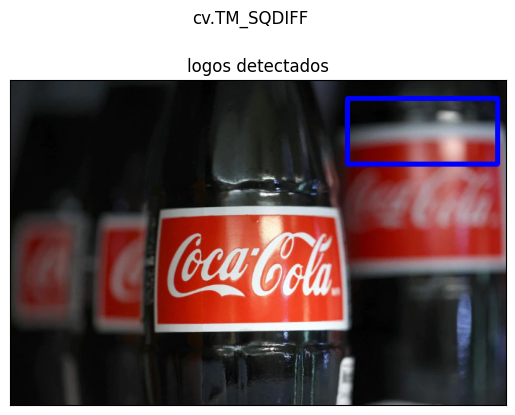

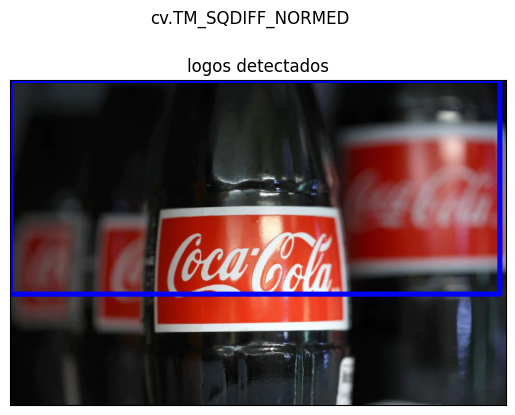

In [9]:
image_path = './images/logo_1.png'
template_path = './template/pattern.png'

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']


for meth in methods:    
    method = eval(meth)
    result_image, found_logos = find_logos(image_path, template_path, method)
    
    plt.figure()
    
    plt.subplot(111),plt.imshow(result_image)
    plt.title(f'logos detectados'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(meth)
    plt.show()

El algoritmo se puede generalizar con el uso del porcentaje. En este caso se utiliza un porcentaje bajo (0.01) por lo que los resultados son similares a los del item 1.